In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [211]:
df = pd.read_csv('day.csv')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [212]:
season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}   # encoding season categorical features back to their original form for visualization and one hot encoding
print(season)

{1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}


In [213]:
df['season'] = df['season'].map(season)  #mapping seasin feature using season dictionary
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [214]:
df.shape #checking dimensions of data

(730, 16)

In [215]:
df.isnull().sum() #checking null values in dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Pairplot

<Figure size 2880x2880 with 0 Axes>

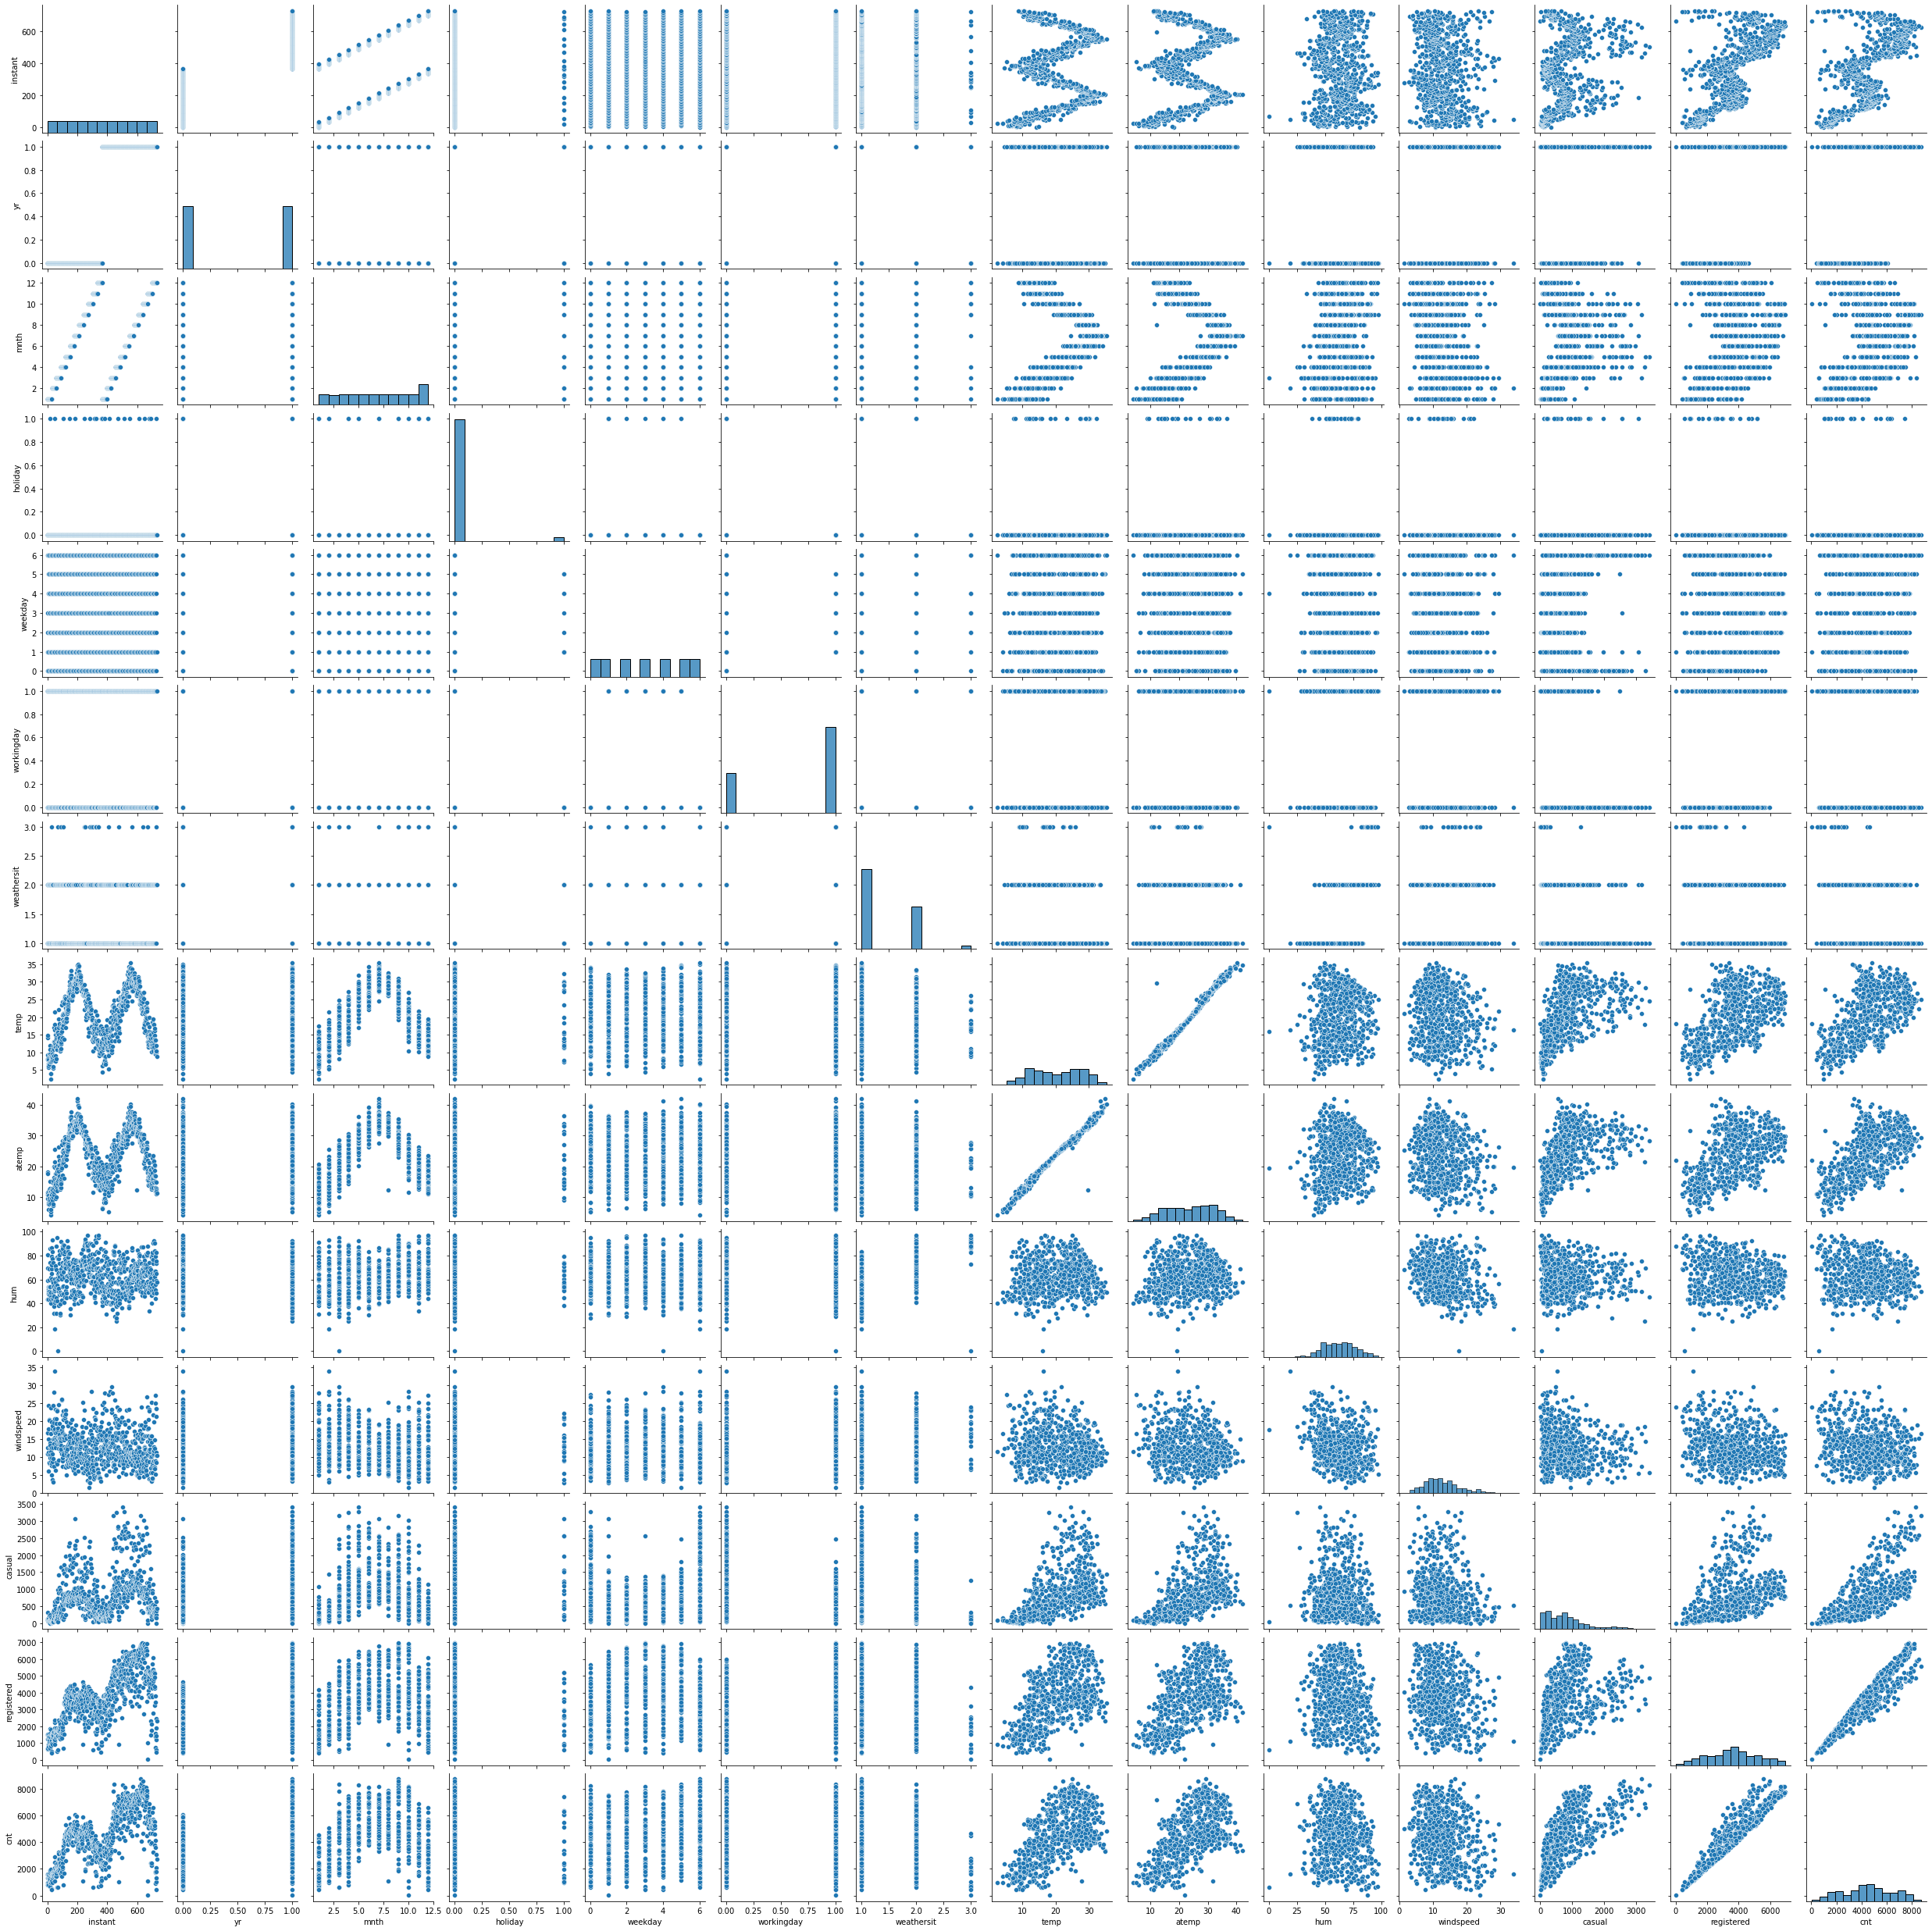

In [216]:
plt.figure(figsize=(40,40))    #using seaborn to visualize numerical features using pairplot
sns.pairplot(df)
plt.show()

1) As per the pairplot we can see that there is very less amount of linear relationship between cnt and windspeed, cnt and humidity.

2) There is linear relationship between atemp(feeling temperature) and cnt. So, mostly there is a high demand of bikes when the feeling temperature rises.

3) There is linear relationship between temp and cnt. So, mostly there is a high demand of bikes when the overall temperature rises.

4) weathersit 2 in data shows that there are better demands than 1 and 3, in 3 it is very less due to rain and snow.

    -(1)-->Clear, Few clouds, Partly cloudy, Partly cloudy
    
    -(2)-->Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    -(3)-->Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
5) If workingday is neither weekend nor holiday(1) then as we can see there are lesser demands compared to weekends or holidays(0).

6) There are more demands on weekends compared to weekdays

7) When there is no holiday (0) there are more demands since people generally prefer to visit offices/business shops compared to holiday(1) where people use to  visit leisure places with families and prefer less bikes.

8) From the months features we can see that there are higher demands in month middle of the year due to high temperature and humidity compared to months at the beginning or end of the year.'

9) Comparing to 2018(0) year there are more demands in 2019(1) year which shows bike demands are increasing yearly.

10) There is a very high linear relationship between the casual,registered vs cnt due to the fact that cnt = casual + registered. So there is a very high chance that model can become biased using these two features and giving less weights to other features.

#####  Categorical Features visualization using Boxplot

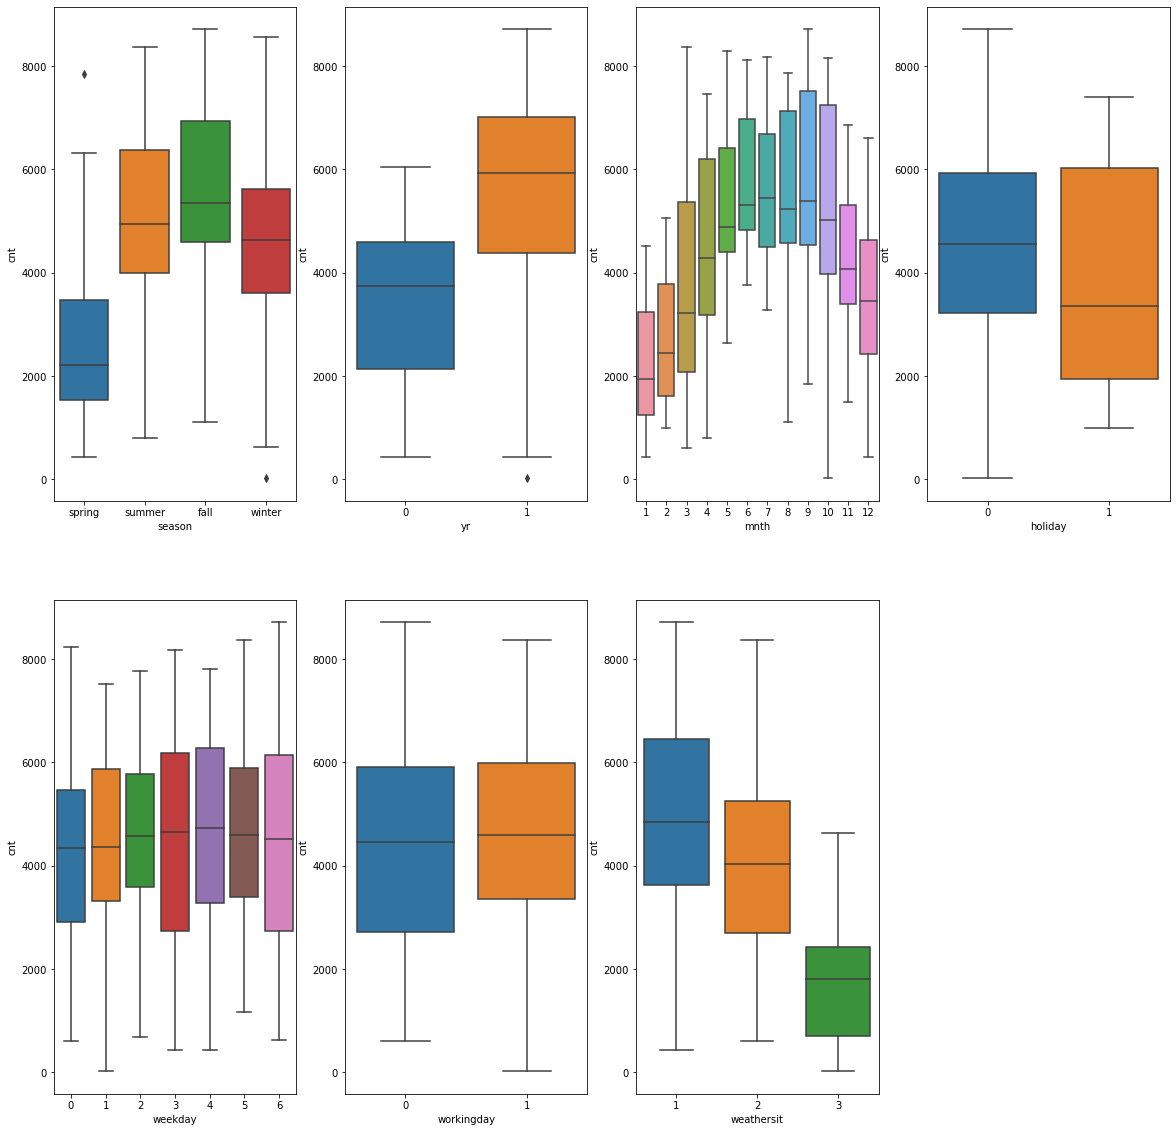

In [217]:
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season',y='cnt',data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr',y='cnt',data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth',y='cnt',data = df)
plt.subplot(2,4,4)                                  #plotting subplots boxplot using seaborn
sns.boxplot(x = 'holiday',y='cnt',data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday',y='cnt',data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday',y='cnt',data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit',y='cnt',data = df)
plt.show()

Comments:

1) In season categories as we can see in boxplot, there are high bike rental demands in fall, summer, winter followed by spring which clearly states that bike rental demands are highly impacted by seasons.

2) In 2018 year there were less bike rental demands and it has increased in 2019 as we can see from year boxplot.

3) In mnth boxplot as we can see there are high demands in summers months compared to winter months.

4) In holiday boxplot as we assume 0 as non-holiday there are high bike demands compared to holiday.

5) We can also see some variations in bike rental demands in weekday features.

6) In workingday boxplot, if we see there are higher bike rental demands in weekdays compared to days having weekend or holidays.

7) Clear, Few clouds, Partly cloudy, Partly cloudy weather has higher bike rental demands followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds which clearly states that rainy days or rainy season will impact bike rental demands.

In [218]:
season_data  = pd.get_dummies(df['season'],drop_first = True)  #one_hot encoding
final_df = df[['yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',  #selecting columns
       'casual', 'registered', 'cnt']]
final_df = pd.concat([season_data,final_df],axis = 1)
final_df.head()

spring  summer  winter  yr  mnth  holiday  weekday  workingday  weathersit  \
0       1       0       0   0     1        0        6           0           2   
1       1       0       0   0     1        0        0           0           2   
2       1       0       0   0     1        0        1           1           1   
3       1       0       0   0     1        0        2           1           1   
4       1       0       0   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

##### Correlation Matrix

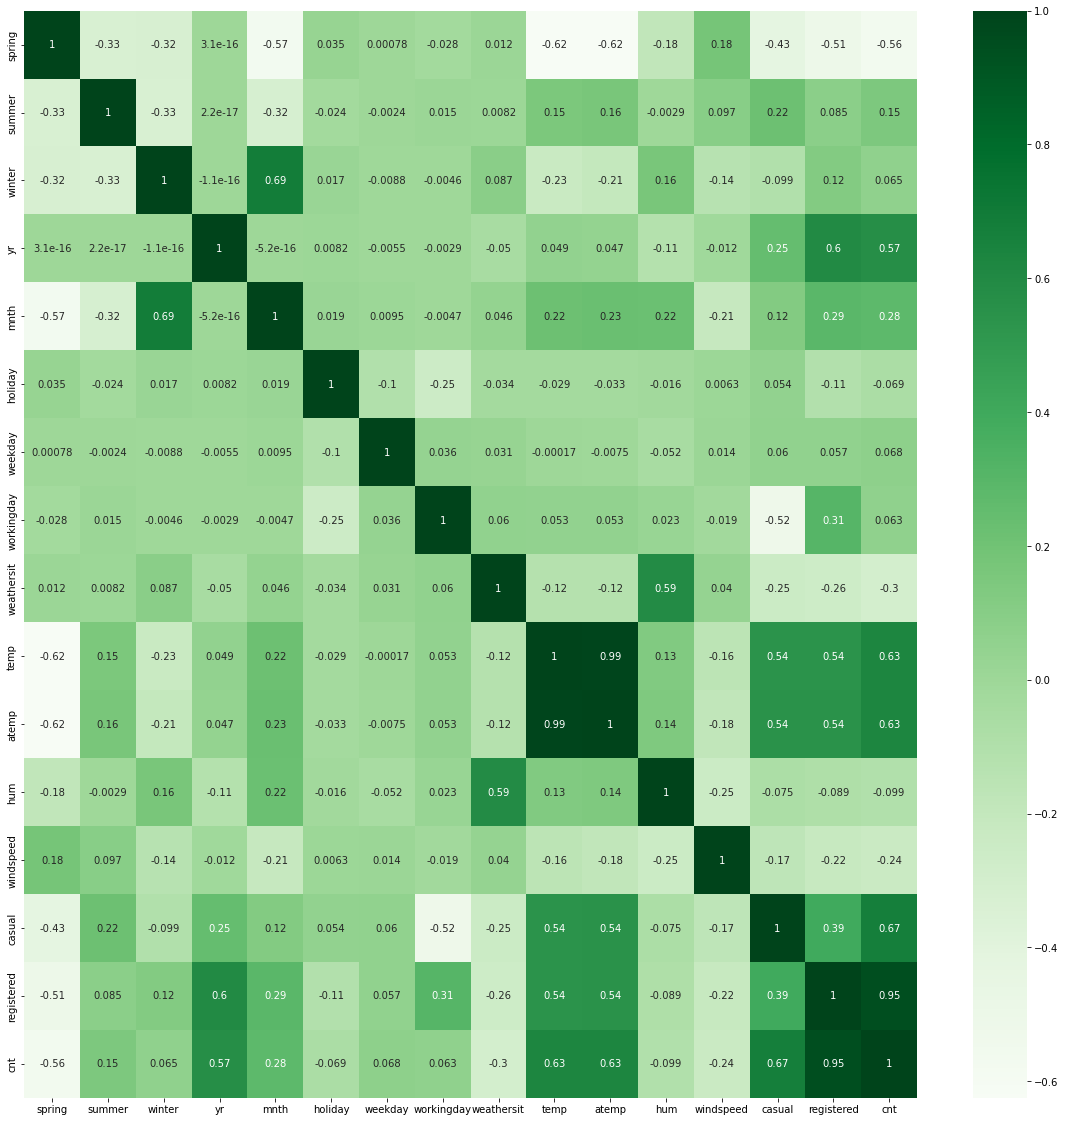

In [219]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(), annot = True, cmap = 'Greens')
plt.show()

1) As we can see from correlation chart there are high number of variables which are correlated among themselves and with target variable (cnt). This also shows there is some multicollinearity in Dataset.

2) Variables like registered and casual are highly correlated with cnt since cnt=casual+registered. There is a high chance that model can get biased by using only these two variables. Hence, we can drop these features (casual,registered).

3) We will use VIF to check multicollinearity in Dataset.

In [220]:
X = final_df.drop(columns = ['casual','registered'], axis = 1)  #dropping casual & registered to avoid biasing

In [221]:
#splitting data into train & test
df_train,df_test = train_test_split(X,test_size = 0.20,random_state = 123)
df_train.shape,df_test.shape

((584, 14), (146, 14))

In [222]:
scaler = MinMaxScaler()  #Using minmaxscaler to bring data on same scale
df_train[['mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']] = scaler.fit_transform(df_train[['mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']])

In [223]:
X_train = df_train.drop('cnt',axis = 1)
y_train = df_train[['cnt']]
X_train.shape

(584, 13)

In [224]:
def calc_vif(X):
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    vif_data.sort_values(by = 'VIF', ascending = False, inplace = True)
    
    return vif_data

In [225]:
calc_vif(X_train)  #vif for all features

feature         VIF
9         temp  402.449870
10       atemp  394.001495
11         hum   28.775558
4         mnth   10.843880
12   windspeed    5.968074
0       spring    4.562775
2       winter    4.283839
7   workingday    3.340260
6      weekday    3.207919
1       summer    2.715705
8   weathersit    2.401768
3           yr    2.076819
5      holiday    1.133855

##### Using Statsmodel  & Stepwise features method

In [226]:
X_train_sm = sm.add_constant(X_train['windspeed'])
lr = sm.OLS(y_train,X_train_sm)                    #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     40.16
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.68e-10
Time:                        00:02:13   Log-Likelihood:                 57.417
No. Observations:                 584   AIC:                            -110.8
Df Residuals:                     582   BIC:                            -102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6426      0.022     29.209      0.000       0.599       0.686
windspeed     -0.3675      0.058     -6.338      0.000      -0.481      -0.254
==============================================================================
Omnibus:                       38.013   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.183
Skew:                          -0.043   Prob(JB):                     0.000832
Kurtosis:                       2.241   Cond. No.                         7.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp']])
lr = sm.OLS(y_train,X_train_sm)            #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.19e-85
Time:                        00:02:13   Log-Likelihood:                 236.18
No. Observations:                 584   AIC:                            -464.4
Df Residuals:                     580   BIC:                            -446.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4899      0.041     11.916      0.000       0.409       0.571
windspeed     -0.2823      0.045     -6.300      0.000      -0.370      -0.194
hum           -0.3585      0.048     -7.474      0.000      -0.453      -0.264
atemp          0.6768      0.031     21.518      0.000       0.615       0.739
==============================================================================
Omnibus:                        5.822   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.187
Skew:                           0.166   Prob(JB):                       0.0747
Kurtosis:                       2.680   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp']])
lr = sm.OLS(y_train,X_train_sm) #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.19e-84
Time:                        00:02:13   Log-Likelihood:                 236.59
No. Observations:                 584   AIC:                            -463.2
Df Residuals:                     579   BIC:                            -441.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4925      0.041     11.948      0.000       0.412       0.573
windspeed     -0.2900      0.046     -6.356      0.000      -0.380      -0.200
hum           -0.3561      0.048     -7.411      0.000      -0.450      -0.262
atemp          0.4727      0.230      2.058      0.040       0.022       0.924
temp           0.1957      0.218      0.897      0.370      -0.233       0.624
==============================================================================
Omnibus:                        8.163   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.357
Skew:                           0.155   Prob(JB):                       0.0417
Kurtosis:                       2.594   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit']])
lr = sm.OLS(y_train,X_train_sm)#using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           7.25e-86
Time:                        00:02:13   Log-Likelihood:                 243.28
No. Observations:                 584   AIC:                            -474.6
Df Residuals:                     578   BIC:                            -448.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4265      0.045      9.568      0.000       0.339       0.514
windspeed     -0.2545      0.046     -5.513      0.000      -0.345      -0.164
hum           -0.2139      0.061     -3.486      0.001      -0.334      -0.093
atemp          0.4410      0.227      1.939      0.053      -0.006       0.888
temp           0.1989      0.216      0.921      0.357      -0.225       0.623
weathersit    -0.1158      0.032     -3.662      0.000      -0.178      -0.054
==============================================================================
Omnibus:                       16.459   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.991
Skew:                           0.204   Prob(JB):                      0.00410
Kurtosis:                       2.467   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday']])
lr = sm.OLS(y_train,X_train_sm)  #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     98.44
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           5.17e-85
Time:                        00:02:13   Log-Likelihood:                 243.76
No. Observations:                 584   AIC:                            -473.5
Df Residuals:                     577   BIC:                            -442.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4168      0.046      9.125      0.000       0.327       0.507
windspeed     -0.2540      0.046     -5.501      0.000      -0.345      -0.163
hum           -0.2117      0.061     -3.446      0.001      -0.332      -0.091
atemp          0.4348      0.228      1.911      0.057      -0.012       0.882
temp           0.2029      0.216      0.940      0.348      -0.221       0.627
weathersit    -0.1178      0.032     -3.717      0.000      -0.180      -0.056
workingday     0.0140      0.014      0.975      0.330      -0.014       0.042
==============================================================================
Omnibus:                       15.825   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.966
Skew:                           0.213   Prob(JB):                      0.00416
Kurtosis:                       2.482   Cond. No.                         77.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday']])
lr = sm.OLS(y_train,X_train_sm) #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     86.81
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           6.67e-86
Time:                        00:02:14   Log-Likelihood:                 248.25
No. Observations:                 584   AIC:                            -480.5
Df Residuals:                     576   BIC:                            -445.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3785      0.047      8.026      0.000       0.286       0.471
windspeed     -0.2521      0.046     -5.497      0.000      -0.342      -0.162
hum           -0.1975      0.061     -3.228      0.001      -0.318      -0.077
atemp          0.4730      0.226      2.090      0.037       0.028       0.918
temp           0.1663      0.215      0.774      0.439      -0.256       0.588
weathersit    -0.1255      0.032     -3.975      0.000      -0.188      -0.064
workingday     0.0140      0.014      0.987      0.324      -0.014       0.042
weekday        0.0596      0.020      2.986      0.003       0.020       0.099
==============================================================================
Omnibus:                       18.401   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.913
Skew:                           0.171   Prob(JB):                      0.00427
Kurtosis:                       2.424   Cond. No.                         80.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday']])
lr = sm.OLS(y_train,X_train_sm) #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.21
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.07e-85
Time:                        00:02:14   Log-Likelihood:                 249.01
No. Observations:                 584   AIC:                            -480.0
Df Residuals:                     575   BIC:                            -440.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3845      0.047      8.113      0.000       0.291       0.478
windspeed     -0.2519      0.046     -5.496      0.000      -0.342      -0.162
hum           -0.1967      0.061     -3.215      0.001      -0.317      -0.077
atemp          0.4638      0.226      2.049      0.041       0.019       0.908
temp           0.1749      0.215      0.814      0.416      -0.247       0.597
weathersit    -0.1260      0.032     -3.991      0.000      -0.188      -0.064
workingday     0.0092      0.015      0.621      0.535      -0.020       0.038
weekday        0.0566      0.020      2.817      0.005       0.017       0.096
holiday       -0.0477      0.039     -1.227      0.221      -0.124       0.029
==============================================================================
Omnibus:                       17.983   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.686
Skew:                           0.167   Prob(JB):                      0.00478
Kurtosis:                       2.427   Cond. No.                         80.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday','mnth']])
lr = sm.OLS(y_train,X_train_sm)  #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     73.21
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.07e-89
Time:                        00:02:14   Log-Likelihood:                 261.15
No. Observations:                 584   AIC:                            -502.3
Df Residuals:                     574   BIC:                            -458.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3679      0.047      7.900      0.000       0.276       0.459
windspeed     -0.2217      0.045     -4.887      0.000      -0.311      -0.133
hum           -0.2514      0.061     -4.123      0.000      -0.371      -0.132
atemp          0.4279      0.222      1.927      0.054      -0.008       0.864
temp           0.1833      0.211      0.870      0.384      -0.230       0.597
weathersit    -0.1187      0.031     -3.831      0.000      -0.180      -0.058
workingday     0.0117      0.014      0.807      0.420      -0.017       0.040
weekday        0.0545      0.020      2.765      0.006       0.016       0.093
holiday       -0.0517      0.038     -1.357      0.175      -0.127       0.023
mnth           0.1078      0.022      4.937      0.000       0.065       0.151
==============================================================================
Omnibus:                       18.849   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.496
Skew:                           0.070   Prob(JB):                      0.00867
Kurtosis:                       2.391   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday','mnth','yr']])
lr = sm.OLS(y_train,X_train_sm)  #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     215.5
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          7.72e-187
Time:                        00:02:14   Log-Likelihood:                 493.60
No. Observations:                 584   AIC:                            -965.2
Df Residuals:                     573   BIC:                            -917.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1590      0.032      4.924      0.000       0.096       0.222
windspeed     -0.1524      0.031     -4.979      0.000      -0.212      -0.092
hum           -0.1145      0.041     -2.771      0.006      -0.196      -0.033
atemp          0.4280      0.149      2.867      0.004       0.135       0.721
temp           0.1447      0.142      1.022      0.307      -0.133       0.423
weathersit    -0.1370      0.021     -6.574      0.000      -0.178      -0.096
workingday     0.0174      0.010      1.788      0.074      -0.002       0.037
weekday        0.0511      0.013      3.856      0.000       0.025       0.077
holiday       -0.0542      0.026     -2.115      0.035      -0.104      -0.004
mnth           0.1095      0.015      7.462      0.000       0.081       0.138
yr             0.2325      0.009     26.405      0.000       0.215       0.250
==============================================================================
Omnibus:                       64.215   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.474
Skew:                          -0.712   Prob(JB):                     4.60e-24
Kurtosis:                       4.545   Cond. No.                         87.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday','mnth','yr','winter']])
lr = sm.OLS(y_train,X_train_sm)  #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.55e-198
Time:                        00:02:14   Log-Likelihood:                 523.99
No. Observations:                 584   AIC:                            -1024.
Df Residuals:                     572   BIC:                            -971.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1590      0.031      5.183      0.000       0.099       0.219
windspeed     -0.1508      0.029     -5.185      0.000      -0.208      -0.094
hum           -0.1354      0.039     -3.441      0.001      -0.213      -0.058
atemp          0.2864      0.143      2.004      0.046       0.006       0.567
temp           0.3726      0.138      2.709      0.007       0.102       0.643
weathersit    -0.1304      0.020     -6.579      0.000      -0.169      -0.091
workingday     0.0139      0.009      1.505      0.133      -0.004       0.032
weekday        0.0519      0.013      4.124      0.000       0.027       0.077
holiday       -0.0523      0.024     -2.147      0.032      -0.100      -0.004
mnth          -0.0202      0.022     -0.938      0.349      -0.062       0.022
yr             0.2301      0.008     27.489      0.000       0.214       0.247
winter         0.1257      0.016      7.920      0.000       0.095       0.157
==============================================================================
Omnibus:                       60.914   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.630
Skew:                          -0.640   Prob(JB):                     1.28e-25
Kurtosis:                       4.753   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday','mnth','yr','winter','summer']])
lr = sm.OLS(y_train,X_train_sm)  #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          4.18e-209
Time:                        00:02:14   Log-Likelihood:                 551.77
No. Observations:                 584   AIC:                            -1078.
Df Residuals:                     571   BIC:                            -1021.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1632      0.029      5.574      0.000       0.106       0.221
windspeed     -0.1750      0.028     -6.263      0.000      -0.230      -0.120
hum           -0.1524      0.038     -4.050      0.000      -0.226      -0.078
atemp          0.1343      0.138      0.974      0.330      -0.136       0.405
temp           0.4828      0.132      3.655      0.000       0.223       0.742
weathersit    -0.1283      0.019     -6.781      0.000      -0.165      -0.091
workingday     0.0131      0.009      1.477      0.140      -0.004       0.030
weekday        0.0501      0.012      4.168      0.000       0.026       0.074
holiday       -0.0523      0.023     -2.252      0.025      -0.098      -0.007
mnth           0.0097      0.021      0.462      0.644      -0.031       0.051
yr             0.2308      0.008     28.893      0.000       0.215       0.247
winter         0.1333      0.015      8.786      0.000       0.104       0.163
summer         0.0756      0.010      7.550      0.000       0.056       0.095
==============================================================================
Omnibus:                       67.105   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.622
Skew:                          -0.619   Prob(JB):                     3.59e-35
Kurtosis:                       5.233   Cond. No.                         91.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday','mnth','yr','winter','summer','spring']])
lr = sm.OLS(y_train,X_train_sm)  #using statsmodel to train model on training data using stepwise features method
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     222.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.53e-213
Time:                        00:02:14   Log-Likelihood:                 565.10
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     570   BIC:                            -1041.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2866      0.037      7.679      0.000       0.213       0.360
windspeed     -0.1667      0.027     -6.092      0.000      -0.221      -0.113
hum           -0.1359      0.037     -3.678      0.000      -0.208      -0.063
atemp          0.1938      0.135      1.432      0.153      -0.072       0.460
temp           0.3107      0.133      2.328      0.020       0.049       0.573
weathersit    -0.1331      0.019     -7.184      0.000      -0.170      -0.097
workingday     0.0134      0.009      1.545      0.123      -0.004       0.030
weekday        0.0495      0.012      4.217      0.000       0.026       0.073
holiday       -0.0464      0.023     -2.038      0.042      -0.091      -0.002
mnth          -0.0400      0.023     -1.771      0.077      -0.084       0.004
yr             0.2341      0.008     29.855      0.000       0.219       0.250
winter         0.0905      0.017      5.317      0.000       0.057       0.124
summer         0.0235      0.014      1.669      0.096      -0.004       0.051
spring        -0.1087      0.021     -5.159      0.000      -0.150      -0.067
==============================================================================
Omnibus:                       77.731   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.905
Skew:                          -0.670   Prob(JB):                     7.15e-46
Kurtosis:                       5.597   Cond. No.                         93.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments:

1) There are different features which has been used to develop different models which has different R2 and adjusted R2 score.

2) If we see from the above we have tried with simple linear regression by taking one feature at a time and later added more features to increase R2 & adjusted R2 in every step.

##### Checking Multicollinearity and feature Selection

In [238]:
calc_vif(X_train)  #checking variance inflation factor of all features

feature         VIF
9         temp  402.449870
10       atemp  394.001495
11         hum   28.775558
4         mnth   10.843880
12   windspeed    5.968074
0       spring    4.562775
2       winter    4.283839
7   workingday    3.340260
6      weekday    3.207919
1       summer    2.715705
8   weathersit    2.401768
3           yr    2.076819
5      holiday    1.133855

In [239]:
X  =  X_train.drop('atemp',axis = 1)
calc_vif(X)                            #checking VIF after removing atemp feature

feature        VIF
10         hum  28.671442
9         temp  15.776262
4         mnth  10.843828
11   windspeed   5.699471
0       spring   4.489123
2       winter   4.157007
7   workingday   3.339632
6      weekday   3.197177
1       summer   2.615975
8   weathersit   2.399943
3           yr   2.076717
5      holiday   1.132441

In [240]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','temp','weathersit','workingday','weekday','holiday','mnth','yr','winter','summer','spring']])
lr = sm.OLS(y_train,X_train_sm)  # Checking significane value of features after removing high VIF value feature stepwise
lr_model = lr.fit()      
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          2.67e-214
Time:                        00:02:14   Log-Likelihood:                 564.05
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     571   BIC:                            -1045.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2876      0.037      7.701      0.000       0.214       0.361
windspeed     -0.1746      0.027     -6.504      0.000      -0.227      -0.122
hum           -0.1337      0.037     -3.619      0.000      -0.206      -0.061
temp           0.4965      0.031     15.940      0.000       0.435       0.558
weathersit    -0.1337      0.019     -7.210      0.000      -0.170      -0.097
workingday     0.0135      0.009      1.559      0.120      -0.004       0.030
weekday        0.0485      0.012      4.134      0.000       0.025       0.072
holiday       -0.0475      0.023     -2.089      0.037      -0.092      -0.003
mnth          -0.0402      0.023     -1.775      0.076      -0.085       0.004
yr             0.2340      0.008     29.816      0.000       0.219       0.249
winter         0.0943      0.017      5.607      0.000       0.061       0.127
summer         0.0268      0.014      1.925      0.055      -0.001       0.054
spring        -0.1061      0.021     -5.050      0.000      -0.147      -0.065
==============================================================================
Omnibus:                       74.115   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.814
Skew:                          -0.640   Prob(JB):                     1.11e-43
Kurtosis:                       5.547   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments:

1) As we can see from the last step wise model we have few features which are not significant among those are one of the feature atemp which has high vif value. So we removed  that feature from the data and trained linear regression model.

2) After removing atemp and training model, we found that there is no change in R2 and adjusted R2 score.

3) VIF of other features has abruptly decreased which resembles that atemp was highly correlated with other feature like temp.

In [241]:
X  =  X_train.drop(columns = ['atemp','mnth'],axis = 1)
calc_vif(X)  #checking vif after removing atemp and mnth feature

feature        VIF
9          hum  25.669940
8         temp  15.019936
10   windspeed   5.620432
0       spring   4.028657
6   workingday   3.339545
5      weekday   3.172460
2       winter   3.026667
7   weathersit   2.367924
1       summer   2.303513
3           yr   2.071668
4      holiday   1.128870

In [242]:
X_train_sm = sm.add_constant(X_train[['windspeed','hum','temp','weathersit','workingday','weekday','holiday','yr','winter','summer','spring']])
lr = sm.OLS(y_train,X_train_sm) # Checking significane value of features after removing high VIF value feature stepwise
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          7.73e-215
Time:                        00:02:14   Log-Likelihood:                 562.44
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     572   BIC:                            -1048.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2676      0.036      7.502      0.000       0.198       0.338
windspeed     -0.1733      0.027     -6.445      0.000      -0.226      -0.120
hum           -0.1406      0.037     -3.818      0.000      -0.213      -0.068
temp           0.4957      0.031     15.886      0.000       0.434       0.557
weathersit    -0.1329      0.019     -7.157      0.000      -0.169      -0.096
workingday     0.0142      0.009      1.641      0.101      -0.003       0.031
weekday        0.0481      0.012      4.095      0.000       0.025       0.071
holiday       -0.0492      0.023     -2.159      0.031      -0.094      -0.004
yr             0.2339      0.008     29.750      0.000       0.218       0.249
winter         0.0831      0.016      5.320      0.000       0.052       0.114
summer         0.0374      0.013      2.977      0.003       0.013       0.062
spring        -0.0902      0.019     -4.739      0.000      -0.128      -0.053
==============================================================================
Omnibus:                       75.783   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.170
Skew:                          -0.661   Prob(JB):                     9.29e-44
Kurtosis:                       5.529   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments:

1) After atemp feature removal we removed mnth feature since mnth had high vif and high p-value. So we removed  that feature from the data and trained linear regression model.

2) After removing mnth and training model, we found that there is very slight change in R2 and adjusted R2 score but we have treated multicollinearity in dataset

3) VIF of other features has abruptly decreased which resembles that mnth was highly correlated with other feature like humidity.

In [243]:
X = X_train.drop(columns = ['atemp','hum','mnth'],axis = 1)
calc_vif(X)  #checking vif after removing atemp ,hum, mnth feature

feature       VIF
9   windspeed  5.597113
8        temp  5.587719
6  workingday  3.321417
5     weekday  3.156472
0      spring  2.489223
3          yr  2.063822
1      summer  1.937881
2      winter  1.798400
7  weathersit  1.526702
4     holiday  1.126121

In [244]:
X_train_sm = sm.add_constant(X_train[['windspeed','temp','weathersit','workingday','weekday','holiday','yr','winter','summer','spring']])
lr = sm.OLS(y_train,X_train_sm) # Checking significane value of features after removing high VIF value feature stepwise
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     279.5
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          5.89e-213
Time:                        00:02:14   Log-Likelihood:                 555.09
No. Observations:                 584   AIC:                            -1088.
Df Residuals:                     573   BIC:                            -1040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1878      0.029      6.421      0.000       0.130       0.245
windspeed     -0.1420      0.026     -5.480      0.000      -0.193      -0.091
temp           0.4722      0.031     15.257      0.000       0.411       0.533
weathersit    -0.1779      0.015    -12.250      0.000      -0.206      -0.149
workingday     0.0155      0.009      1.767      0.078      -0.002       0.033
weekday        0.0516      0.012      4.350      0.000       0.028       0.075
holiday       -0.0498      0.023     -2.159      0.031      -0.095      -0.004
yr             0.2379      0.008     30.176      0.000       0.222       0.253
winter         0.0733      0.016      4.703      0.000       0.043       0.104
summer         0.0338      0.013      2.669      0.008       0.009       0.059
spring        -0.0939      0.019     -4.882      0.000      -0.132      -0.056
==============================================================================
Omnibus:                       70.048   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.120
Skew:                          -0.626   Prob(JB):                     9.40e-39
Kurtosis:                       5.372   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments:

1) After atemp,mnth feature removal we removed hum feature since hum had high vif. So we removed  that feature from the data and trained linear regression model.

2) After removing hum and training model, we found that there is no change in R2 and adjusted R2 score and we have treated multicollinearity in dataset

3) VIF of other features has abruptly decreased which resembles that hum was highly correlated with other feature like temp etc

In [245]:
X = X_train.drop(columns = ['atemp','hum','mnth','windspeed'],axis = 1)
calc_vif(X)  #checking vif after removing atemp ,hum, mnth,windspeed feature

feature       VIF
8        temp  4.471307
6  workingday  3.311087
5     weekday  3.117348
3          yr  2.062645
0      spring  1.808761
1      summer  1.705981
2      winter  1.656122
7  weathersit  1.517856
4     holiday  1.124671

In [246]:
X_train_sm = sm.add_constant(X_train[['temp','weathersit','workingday','weekday','holiday','yr','winter','summer','spring']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()           # Checking significane value of features after removing high VIF value feature stepwise
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     292.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          7.28e-208
Time:                        00:02:14   Log-Likelihood:                 540.18
No. Observations:                 584   AIC:                            -1060.
Df Residuals:                     574   BIC:                            -1017.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1334      0.028      4.730      0.000       0.078       0.189
temp           0.4851      0.032     15.336      0.000       0.423       0.547
weathersit    -0.1803      0.015    -12.116      0.000      -0.210      -0.151
workingday     0.0159      0.009      1.770      0.077      -0.002       0.033
weekday        0.0499      0.012      4.109      0.000       0.026       0.074
holiday       -0.0508      0.024     -2.150      0.032      -0.097      -0.004
yr             0.2401      0.008     29.745      0.000       0.224       0.256
winter         0.0792      0.016      4.965      0.000       0.048       0.110
summer         0.0271      0.013      2.093      0.037       0.002       0.052
spring        -0.0988      0.020     -5.017      0.000      -0.137      -0.060
==============================================================================
Omnibus:                       79.433   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.395
Skew:                          -0.653   Prob(JB):                     1.26e-51
Kurtosis:                       5.816   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments:

1) After atemp,mnth,hum feature removal we removed windspeed feature since windspeed had high vif. So we removed  that feature from the data and trained linear regression model.

2) After removing windspeed and training model, we found that there is no change in R2 and adjusted R2 score and we have treated multicollinearity in dataset

3) VIF of other features has abruptly decreased and became less than 5 which resembles that windspeed was highly correlated with other feature like temp etc

In [247]:
X_train_sm = sm.add_constant(X_train[['temp','weathersit','weekday','holiday','yr','winter','summer','spring']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()           # Checking significane value of features after removing high VIF value feature stepwise
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     327.3
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.85e-208
Time:                        00:02:14   Log-Likelihood:                 538.59
No. Observations:                 584   AIC:                            -1059.
Df Residuals:                     575   BIC:                            -1020.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1426      0.028      5.137      0.000       0.088       0.197
temp           0.4880      0.032     15.421      0.000       0.426       0.550
weathersit    -0.1791      0.015    -12.024      0.000      -0.208      -0.150
weekday        0.0492      0.012      4.047      0.000       0.025       0.073
holiday       -0.0621      0.023     -2.726      0.007      -0.107      -0.017
yr             0.2398      0.008     29.662      0.000       0.224       0.256
winter         0.0799      0.016      5.005      0.000       0.049       0.111
summer         0.0279      0.013      2.156      0.032       0.002       0.053
spring        -0.0978      0.020     -4.959      0.000      -0.136      -0.059
==============================================================================
Omnibus:                       84.274   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.334
Skew:                          -0.707   Prob(JB):                     1.76e-52
Kurtosis:                       5.792   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
X = X_train.drop(columns = ['atemp','hum','mnth','windspeed','workingday'],axis = 1)
calc_vif(X)

feature       VIF
7        temp  3.443701
5     weekday  3.116662
3          yr  2.062549
1      summer  1.645920
0      spring  1.587989
2      winter  1.545094
6  weathersit  1.509499
4     holiday  1.048268

Comments:

1) After atemp,mnth,hum,windspeed feature removal we removed workingday feature since workingday had high p-value. So we removed  that feature from the data and trained linear regression model.

2) After removing windspeed and training model, we found that there is no change in R2 and adjusted R2 score and we have treated multicollinearity in dataset

3) VIF of other features has  decreased and became less than 5 which resembles that workingday was some small correlation with other feature like temp etc

4) We will be using this model on our test dataset since this model is best model with no multicollinearity and no overfitting.

#####  Using Best Model for predicition and model evaluation

In [249]:
def adjusted_r2(y,y_pred,X):
    
    return  1 - (((1-r2_score(y, y_pred)) * (len(y)-1))/(len(y)-X.shape[1]-1))

In [250]:
df_test[['mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']] = scaler.transform(df_test[['mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']])
df_test.head()

spring  summer  winter  yr      mnth  holiday   weekday  workingday  \
591       0       0       0   1  0.636364        0  0.500000           1   
455       0       1       0   1  0.272727        0  0.000000           0   
226       0       0       0   0  0.636364        0  0.166667           1   
131       0       1       0   0  0.363636        0  0.666667           1   
232       0       0       0   0  0.636364        0  0.000000           0   

     weathersit      temp     atemp       hum  windspeed       cnt  
591         0.0  0.806862  0.769392  0.637103   0.303830  0.842729  
455         0.5  0.456929  0.452585  0.695373   0.308976  0.692476  
226         0.0  0.755981  0.718716  0.732219   0.384608  0.496549  
131         0.0  0.592957  0.594530  0.768638   0.344847  0.557064  
232         0.0  0.812053  0.798146  0.791774   0.466658  0.443051

In [251]:
X_test = df_test[['temp','weathersit','weekday','holiday','yr','winter','summer','spring']]
y_test = df_test[['cnt']]
X_test = sm.add_constant(X_test)
y_train_pred = lr_model.predict(X_train_sm)    #using best model to predict on test dataset
y_test_pred = lr_model.predict(X_test)
print('Training r2 score:',r2_score(y_train,y_train_pred),'|','Training adjusted r2 score:',adjusted_r2(y_train,y_train_pred,X_train_sm))

print('Test r2 score:',r2_score(y_test,y_test_pred),'|','Test adjusted r2 score:',adjusted_r2(y_test,y_test_pred,X_test))

Training r2 score: 0.8199613198372392 | Training adjusted r2 score: 0.817138413702283
Test r2 score: 0.7418915290393177 | Test adjusted r2 score: 0.7248108214022138


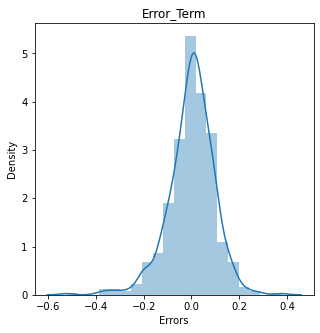

In [252]:
#Plotting normal distribution of histogram
plt.figure(figsize=(5,5))
sns.distplot((y_train['cnt']-y_train_pred), bins = 20)
plt.title('Error_Term')
plt.xlabel('Errors')
plt.show()

Observations:

1) As we can see from the distribution, the error term is normally distributed which is following the assumptions of Linear Regression.

2) The best model has been trained using features which are not multicollinear in nature and are significant features.

In [260]:
X_train_sm

const      temp  weathersit   weekday  holiday  yr  winter  summer  \
704    1.0  0.245101         0.0  0.666667        0   1       1       0   
565    1.0  0.755981         0.5  0.833333        0   1       0       0   
185    1.0  0.856704         0.0  0.333333        0   0       0       0   
269    1.0  0.719639         0.5  0.333333        0   0       1       0   
178    1.0  0.853589         0.0  0.333333        0   0       0       0   
..     ...       ...         ...       ...      ...  ..     ...     ...   
98     1.0  0.353092         0.5  1.000000        0   0       0       1   
322    1.0  0.336479         0.0  1.000000        0   0       1       0   
382    1.0  0.304288         0.0  0.500000        0   1       0       0   
365    1.0  0.387359         0.0  0.000000        0   1       0       0   
510    1.0  0.789210         0.0  1.000000        0   1       0       1   

     spring  
704       0  
565       0  
185       0  
269       0  
178       0  
..      ...  
98        0  
322       0  
382       1  
365       1  
510       0  

[584 rows x 9 columns]

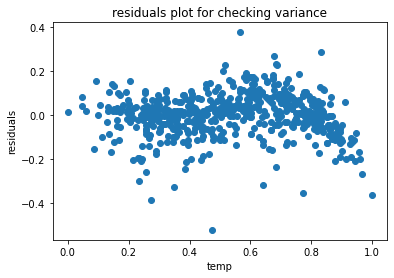

In [263]:
plt.scatter(X_train_sm.iloc[:,1],y_train['cnt']-y_train_pred)
plt.xlabel('temp')         #scatter plot to check linear regression assumptions for residuals patterns and residual variance
plt.ylabel('residuals')
plt.title('residuals plot for checking variance')
plt.show()

Observations:

    1) As we can see that residuals are not having any patterns against temp numerical feature.
    2) There are little variance observed in residuals but they are not much impacting the model.

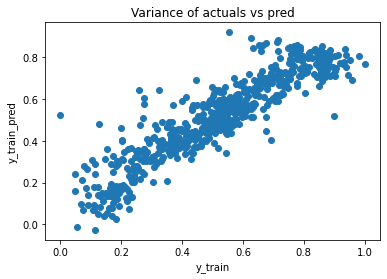

In [202]:
plt.scatter(y_train,y_train_pred)
plt.title('Variance of actuals vs pred')
plt.xlabel('y_train')                     #scatter plot to check varaince between actuals and predicted
plt.ylabel('y_train_pred')
plt.show()

Obervation:

    As we can see that there is small variance between actual and predicted values

##### Using Recursive Feature Elimination (RFE)- Sklearn and statsmodel features to build model

In [203]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator= lm, n_features_to_select= 8)
rfe = rfe.fit(X_train, y_train)

In [204]:
col = X_train.columns[rfe.support_]
print(col)

Index(['spring', 'yr', 'holiday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed'],
      dtype='object')


In [205]:
X_train = X_train[col] #selecting RFE features in training data

In [206]:
df_test_rfe = df_test[col] #selecting RFE features in test data

In [207]:
lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(df_test_rfe)       #using RFE features to train model using SKlearn
y_train_pred = lr_model.predict(X_train_sm)
y_test_pred = lr_model.predict(X_test)
print('Training r2 score:',r2_score(y_train,y_train_pred),'|','Training adjusted r2 score:',adjusted_r2(y_train,y_train_pred,X_train))

print('Test r2 score:',r2_score(y_test,y_test_pred),'|','Test adjusted r2 score:',adjusted_r2(y_test,y_test_pred,df_test_rfe))

Training r2 score: 0.8199613198372392 | Training adjusted r2 score: 0.817456433852366
Test r2 score: 0.7418915290393177 | Test adjusted r2 score: 0.7268195015379639


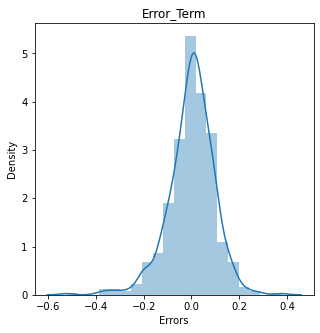

In [208]:
#Plotting normal distribution of histogram after training using RFE
plt.figure(figsize=(5,5))
sns.distplot((y_train['cnt']-y_train_pred), bins = 20)
plt.title('Error_Term')
plt.xlabel('Errors')
plt.show()

In [209]:
calc_vif(X_train)  #RFE features VIF

feature         VIF
5       atemp  372.492732
4        temp  358.348450
6         hum   14.964690
7   windspeed    4.833701
3  weathersit    2.207107
1          yr    2.001466
0      spring    1.929781
2     holiday    1.036857

Observations:

1) As we can see from the distribution, the error term is normally distributed which is following the assumptions of Linear Regression.

2) As we can see after RFE there is a high multicollinearity which exists among features. Hence, we can go with statsmodel stepwise feature selection and use that model for predictions.

Conclusions:

1) We saw from correlation matrix how features like temp,atemp,seasons,windspeed etc were correlated among themselves and with target cnt.

2) We observed from pairplot that how features like temp, weekday, seasonal features like summer, spring etc were impacting cnt.

3) We also observed how categorical features are impacting bike rental demands using boxplot.

4) We tried with stepwise features to improve R2 and adjusted R2 and then backward feature elimination to check and reduce multicollinearity. This step is done in two ways:

                    a) Using statsmodel api
                    b) Using RFE
                    
5) We saw best model using statsmodel api with reduced multicollinearity. Features that we analyzed were:  

                ['temp','weathersit','weekday','holiday','yr','winter','summer','spring']
   using which linear regression model is trained to come up with best model
   
6) We tried with RFE. The model is trained using Sklearn library but we found out that though the r2 and adjusted R2 is same but it seems there is a very high multicollinearity among features.

7) Hence, we can use statsmodel api model as best model for our Bike Rentals Demand predictions.

8) Using statsmodel api model as best model for our Bike Rentals Demand predictions we found that model is following the assumptions of linear regression.